In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
anchor_path = os.path.join('data', 'anchor')
positive_path = os.path.join('data', 'positive')
negative_path = os.path.join('data', 'negative')

In [3]:
anchor_path

'data/anchor'

In [4]:
print(f"Total Anchor Sample: {len(os.listdir('/Users/sudipkhadka/Desktop/Face-Recognition/Research/data/anchor'))}")

Total Anchor Sample: 319


In [5]:
print(f"Total Positive Sample: {len(os.listdir('/Users/sudipkhadka/Desktop/Face-Recognition/Research/data/positive'))}")

Total Positive Sample: 414


In [6]:
print(f"Total Negative Sample: {len(os.listdir('/Users/sudipkhadka/Desktop/Face-Recognition/Research/data/negative'))}")

Total Negative Sample: 13233


In [7]:
## we are taking 300 images 
anchor_path = tf.data.Dataset.list_files(anchor_path + '/*.jpg').take(300)
positive_path = tf.data.Dataset.list_files(positive_path + '/*.jpg').take(300)


In [8]:
len(anchor_path)

300

In [9]:
len(positive_path)

300

In [10]:
len(anchor_path)

300

In [11]:
negative_path = tf.data.Dataset.list_files(negative_path + '/*.jpg').take(300)

In [12]:
neative_dir = negative_path.as_numpy_iterator()
neative_dir.next()

b'data/negative/Amy_Redford_0001.jpg'

In [13]:
pos_dir = positive_path.as_numpy_iterator()
pos_dir.next()


b'data/positive/85eac5d6-9e18-11ef-aea7-864fe23a46a4.jpg'

In [14]:
from PIL import Image

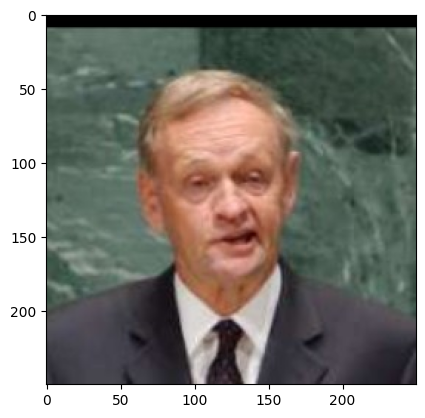

In [15]:
plt.imshow(Image.open('data/negative/Jean_Chretien_0004.jpg'))

In [16]:
## Preprocessing 

In [17]:
def img_preprocess(image_path):
    read_img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(read_img)
    img = tf.image.resize(img, (105,105))
    img = img / 255.0 #scales image in between 0-1
    return img

In [18]:
## Create a paired labels
positive_label = tf.data.Dataset.zip((anchor_path, positive_path, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_path)))))
negative_label = tf.data.Dataset.zip((anchor_path, negative_path, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_path)))))
labeled_pair_df = positive_label.concatenate(negative_label)

In [19]:
tf.ones(len(positive_label))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [20]:
labeled_pair_df

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [21]:
class_lab = tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_path)))

In [22]:
itr = class_lab.as_numpy_iterator()

In [23]:
itr.next()

np.float32(1.0)

In [24]:
sam = labeled_pair_df.as_numpy_iterator()
sam.next()

(b'data/anchor/6ea99a00-9e18-11ef-aea7-864fe23a46a4.jpg',
 b'data/positive/a8de0740-9e5b-11ef-96a7-864fe23a46a4.jpg',
 np.float32(1.0))

In [25]:
sample = sam.next()

In [26]:
sample[0]

b'data/anchor/de2f4cfe-9d68-11ef-943c-864fe23a46a4.jpg'

In [27]:
## Train test Split
def train_test_preprocessing(input_img, validation_img, label):
    return(img_preprocess(input_img), img_preprocess(validation_img), label)

In [28]:
train_test_preprocessing(*sample) # * unpacks all tuples and pass as an argument

(<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
 array([[[0.7466275 , 0.7466275 , 0.7074118 ],
         [0.7315726 , 0.73941576, 0.6962785 ],
         [0.6298609 , 0.63378245, 0.6024099 ],
         ...,
         [0.8352144 , 0.82737124, 0.77639085],
         [0.6442972 , 0.6286109 , 0.5815521 ],
         [0.7117494 , 0.6906475 , 0.64358866]],
 
        [[0.6814192 , 0.6814192 , 0.63977593],
         [0.74729896, 0.7551421 , 0.7041617 ],
         [0.6072029 , 0.615046  , 0.5719088 ],
         ...,
         [0.8150061 , 0.80716294, 0.75170076],
         [0.66654587, 0.6508596 , 0.6038008 ],
         [0.7212911 , 0.70018923, 0.6477148 ]],
 
        [[0.61860746, 0.61860746, 0.5793918 ],
         [0.7645458 , 0.76753366, 0.72682405],
         [0.5877195 , 0.5877195 , 0.55634695],
         ...,
         [0.7904764 , 0.78263324, 0.7238097 ],
         [0.67985815, 0.6641719 , 0.61711305],
         [0.6166218 , 0.5955199 , 0.5484611 ]],
 
        ...,
 
        [[0.8318349 , 0.8239918 

In [29]:
len(train_test_preprocessing(*sample))

3

In [30]:
##Building data pipeline
data = labeled_pair_df.map(train_test_preprocessing)
data = data.cache()
data = data.shuffle(buffer_size=1024) 

In [31]:
len(data)

600

In [32]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [33]:
sample = data.as_numpy_iterator()

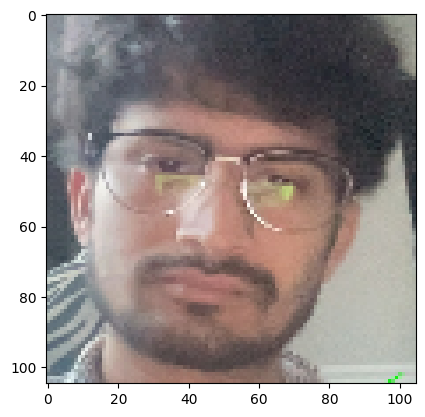

In [34]:
samp = sample.next()
plt.imshow(samp[0])

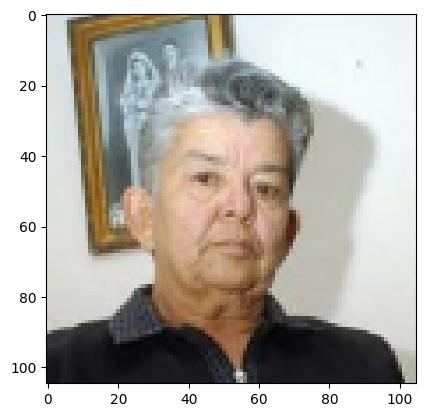

In [35]:
plt.imshow(samp[1])

In [36]:
samp[2]

np.float32(0.0)

In [87]:
#train split
train_data = data.take(round(len(data)*.8))
train_data = train_data.batch(4)
#train_data = train_data.prefetch(4)

#test split
test_data = data.skip(round(len(data)*.2))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(4)
#test_data = test_data.prefetch(4)

In [78]:
train_data

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [88]:
len(train_data)

120

In [79]:
train_samp = train_data.as_numpy_iterator()
train_samp = train_samp.next()
len(train_samp)

3

In [80]:
train_samp[2]

array([0., 1., 0., 0.], dtype=float32)

In [81]:
train_samp[:2]

(array([[[[0.08743053, 0.05471522, 0.0181317 ],
          [0.09737229, 0.06207817, 0.02678405],
          [0.08767062, 0.04864167, 0.02305811],
          ...,
          [0.7071939 , 0.64052725, 0.46797818],
          [0.72302276, 0.6563561 , 0.48772866],
          [0.70614475, 0.6394781 , 0.46956122]],
 
         [[0.09202348, 0.05224757, 0.03013205],
          [0.08771509, 0.05242097, 0.02496999],
          [0.06921435, 0.03840202, 0.00871015],
          ...,
          [0.72999877, 0.6633321 , 0.49302402],
          [0.72024816, 0.6535815 , 0.48495406],
          [0.69737244, 0.6307058 , 0.46207833]],
 
         [[0.09720334, 0.05649371, 0.04566271],
          [0.09438442, 0.05909029, 0.03948245],
          [0.07586145, 0.04841048, 0.01703793],
          ...,
          [0.70317906, 0.63651234, 0.4639634 ],
          [0.7041885 , 0.63752186, 0.46889436],
          [0.7254902 , 0.65882355, 0.48851982]],
 
         ...,
 
         [[0.30755854, 0.30755854, 0.35218972],
          [0.36955

In [82]:
train_samp = train_data.as_numpy_iterator()
train_samp = train_samp.next()
len(train_samp[0]) #no of image for each sample 

4

In [44]:
len(test_data)

45

## Training

In [45]:
!pwd

/Users/sudipkhadka/Desktop/Face-Recognition/Research


In [46]:
os.chdir('/Users/sudipkhadka/Desktop/Face-Recognition')

In [47]:
!pwd

/Users/sudipkhadka/Desktop/Face-Recognition


In [48]:
from train import training_loop


In [89]:
epoch = 8
num_images = len(train_data)
batch_size = 4
steps_per_epoch = num_images // batch_size
training_loop(train_data, epoch)


 Epoch 1/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 120s 997ms/step

 Epoch 2/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 118s 983ms/step

 Epoch 3/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step

 Epoch 4/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step

 Epoch 5/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step

 Epoch 6/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 118s 983ms/step

 Epoch 7/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step

 Epoch 8/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 118s 982ms/step


2024-11-10 14:42:19.549455: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Model Evaluation

In [90]:
from tensorflow.keras.metrics import Precision, Recall
from train import siamese_model

In [111]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [112]:
yhat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [113]:
yhat

array([[9.9999249e-01],
       [5.0277020e-05],
       [3.8158146e-07],
       [9.9999875e-01]], dtype=float32)

In [114]:
prediction = [1 if prediction > 0.5 else 0 for prediction in yhat]
prediction

[1, 0, 0, 1]

In [115]:
y_true

array([1., 0., 0., 1.], dtype=float32)

In [116]:
##Calculate metrics - Recall
metrics = Recall()
metrics.update_state(y_true, yhat)
metrics.result().numpy()

np.float32(1.0)

In [117]:
##Precision
prec = Precision()
prec.update_state(y_true, yhat)
prec.result().numpy()

np.float32(1.0)

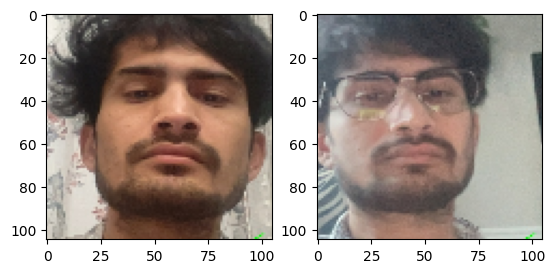

Prediction:1


In [118]:
plt.Figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()
print(f"Prediction:{prediction[0]}")

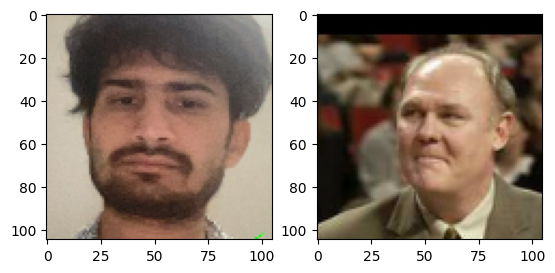

Prediction:0


In [119]:
plt.Figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(test_input[1])
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()
print(f"Prediction:{prediction[1]}")

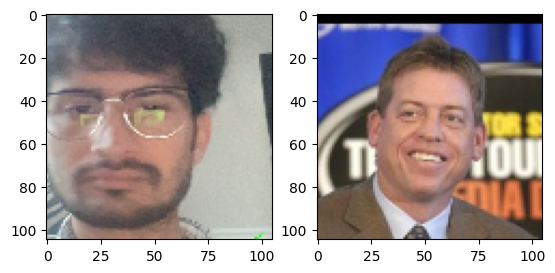

Prediction:0


In [120]:
plt.Figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(test_input[2])
plt.subplot(1,2,2)
plt.imshow(test_val[2])
plt.show()
print(f"Prediction:{prediction[2]}")

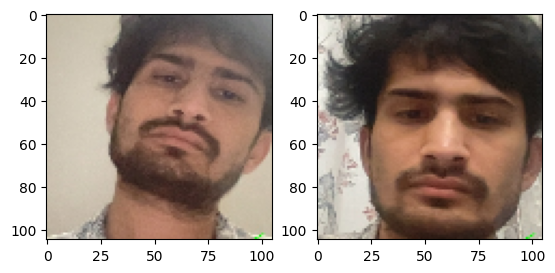

Prediction:1


In [121]:
plt.Figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(test_input[3])
plt.subplot(1,2,2)
plt.imshow(test_val[3])
plt.show()
print(f"Prediction:{prediction[3]}")

## Save Model 

In [101]:
###Save model keras
siamese_model.save('siameseModel.keras')